# Import Libraries

In [103]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


mpl.style.use('ggplot')

# Data

In [7]:
df = pd.read_excel("grades.xlsx")
df.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG
0,3419,M,Mechanic of Materials,5,2020,Spring,3.602917,3.58750,4.77500,4.067125
1,3418,M,Mechanic of Materials,5,2020,Spring,4.060000,3.83750,4.77500,4.279250
2,3425,M,Mechanic of Materials,5,2020,Spring,3.848688,4.03125,4.73125,4.256481
3,3463,M,Mechanic of Materials,5,2020,Spring,3.580167,3.83750,4.77500,4.135300
4,3393,F,Mechanic of Materials,5,2020,Spring,3.212292,3.10000,5.00000,3.893687


## Dataframe information

This dataset contains the grade records for several students of the Mechatronics Engineering Program from 2020 to 2023. Each semesters is splitted into three periods (G1, G2, G3). The Final Grade (FG) is calculated based on the grades from each period using the following equation:

$$ FG = 0.3G_1 + 0.3G_2 + 0.4G_3$$

The grade scale ranges from **0.00** to **5.00**. A student approves the class if $FG \geq 3.00$

All classes belong to the mechanic area of the program. This Mechatronics Engineering Program lasts 10 semesters (5 years)

### Feature description

- **ID**: Student's ID, which increases according to its starting year
- **Sex**: Student's sex (M: Male, F: Female)
- **Class**: Class name
    - Material Science
    - Mechanic of Materials
    - Applied Dynamics
    - Fluid Mechanics
    - Thermofluids
    - Material Selection
    - Forensic Engineering
- **Semester**: Semester in which the class is taught
    - 3
    - 5
    - 6
    - 8
    - 9
- **Year**: Year of the record
- **Type**: Type of semester
    - Spring
    - Fall
- **G1**: Grades for the first period of the semester
- **G2**: Grades for the second period of the semester
- **G3**: Grades for the third period of the semester
- **FG**: Final Grades

In [8]:
# Datafame size

df.shape

(547, 10)

The *dataframe* has **547** strudent's grades records.

In [9]:
# Datatype info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        547 non-null    int64  
 1   Sex       547 non-null    object 
 2   Class     547 non-null    object 
 3   Semester  547 non-null    int64  
 4   Year      547 non-null    int64  
 5   Type      547 non-null    object 
 6   G1        547 non-null    float64
 7   G2        547 non-null    float64
 8   G3        547 non-null    float64
 9   FG        547 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 42.9+ KB


In [10]:
# Numerical statistical information

df.describe()

,ID,Semester,Year,G1,G2,G3,FG
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3572.663620,6.080439,2021.557587,3.399708,3.237098,3.597107,3.429885
std,393.620599,1.890046,1.145893,0.749527,0.875941,1.004334,0.711118
min,1967.000000,3.000000,2020.000000,1.033333,0.000000,0.000000,0.616774
25%,3309.500000,5.000000,2021.000000,2.864826,2.627917,3.096559,3.046663
50%,3526.000000,5.000000,2022.000000,3.471764,3.292242,3.822326,3.475653
75%,3910.500000,8.000000,2023.000000,4.008271,3.914469,4.324326,3.938132
max,4296.000000,9.000000,2023.000000,4.846000,5.001000,5.092500,4.957232


In [11]:
# Categorical information

df.describe(include = "O")

,Sex,Class,Type
count,547,547,547
unique,2,7,2
top,M,Mechanic of Materials,Fall
freq,428,250,294


In [12]:
# Check for missing values

df.isna().any()

ID          False
Sex         False
Class       False
Semester    False
Year        False
Type        False
G1          False
G2          False
G3          False
FG          False
dtype: bool

# EDA

### ID Column

Text(0.5, 1.0, 'ID Distribution')

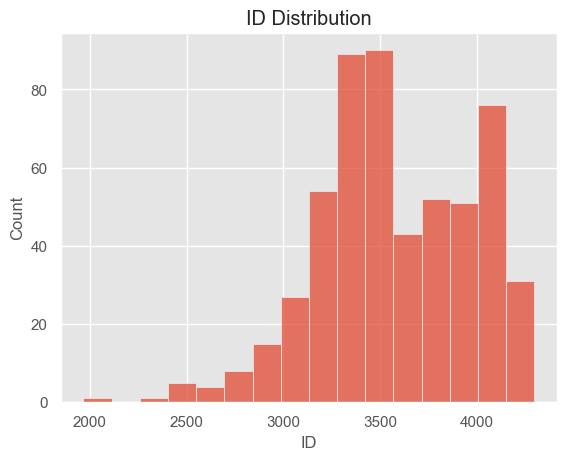

In [141]:
sns.histplot(data = df, x = "ID")
plt.title("ID Distribution")
plt.show()

### Sex

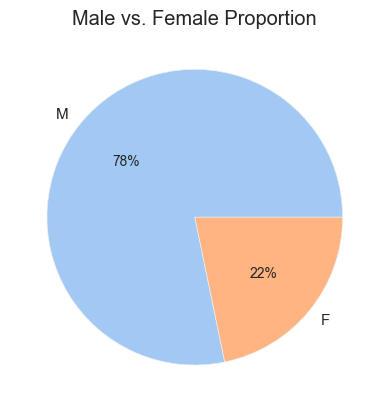

In [142]:
plt.pie(data = pd.DataFrame(df["Sex"].value_counts().reset_index()), x = "count", labels = "Sex", colors = sns.color_palette("pastel"), autopct = "%.0f%%") 
plt.title("Male vs. Female Proportion")
plt.show()

### Class

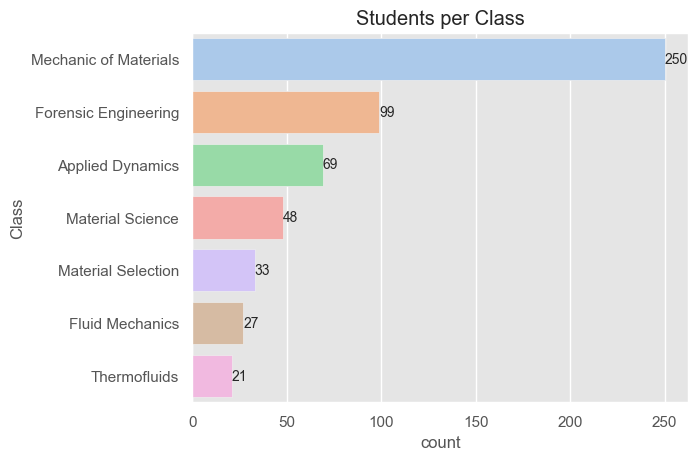

In [143]:
ax = sns.barplot(data = pd.DataFrame(df["Class"].value_counts().reset_index()), y = "Class", x = "count", palette = "pastel", hue = "Class", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.title("Students per Class")
plt.show()

### Year

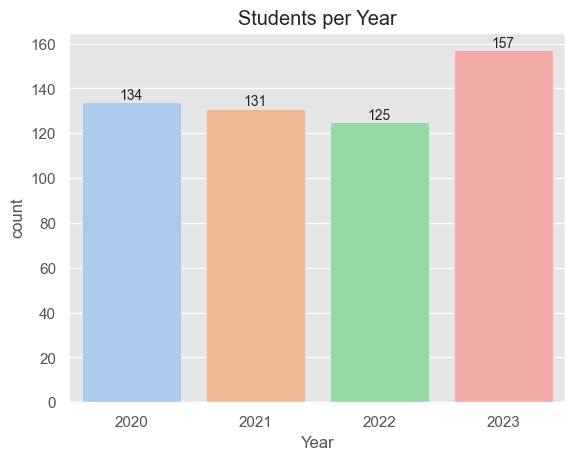

In [144]:
ax = sns.barplot(data = pd.DataFrame(df["Year"].value_counts().reset_index()), y = "count", x = "Year", palette = "pastel", hue = "Year", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.title("Students per Year")
plt.show()

### Type

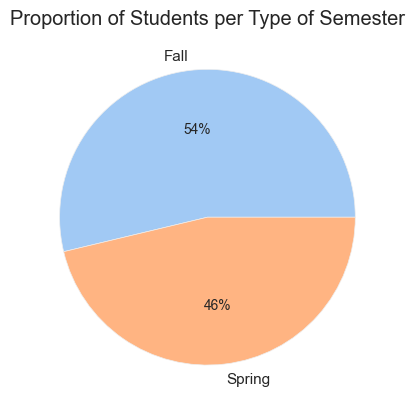

In [145]:
plt.pie(data = pd.DataFrame(df["Type"].value_counts().reset_index()), x = "count", labels = "Type", colors = sns.color_palette("pastel"), autopct = "%.0f%%") 
plt.title("Proportion of Students per Type of Semester")
plt.show()

### Grades

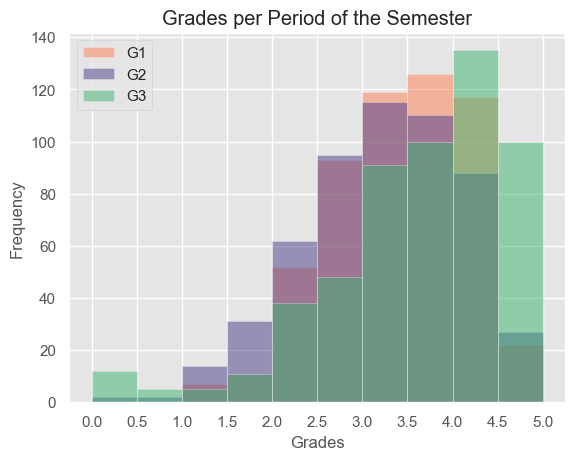

In [146]:
bins_d = np.arange(0,5.5,0.5)

df[["G1", "G2", "G3"]].plot(kind = "hist",
                            bins = bins_d,
                            xticks = bins_d, 
                            alpha = 0.5, 
                            color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.xlabel("Grades")
plt.title("Grades per Period of the Semester - Count")
plt.show()

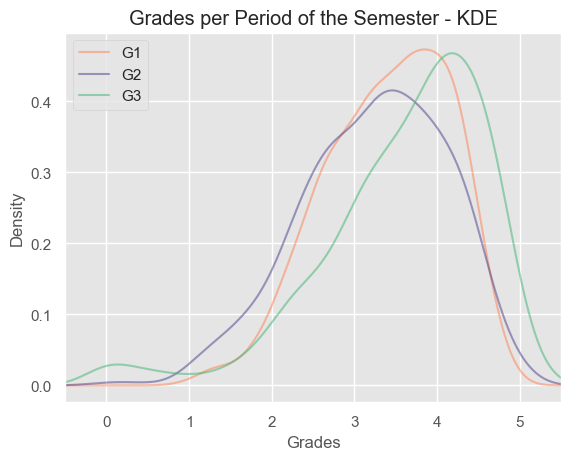

In [149]:
df[["G1", "G2", "G3"]].plot(kind = "kde", 
                            alpha = 0.5, 
                            color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.xlabel("Grades")
plt.xlim([-0.5, 5.5])
plt.title("Grades per Period of the Semester - KDE")
plt.show()

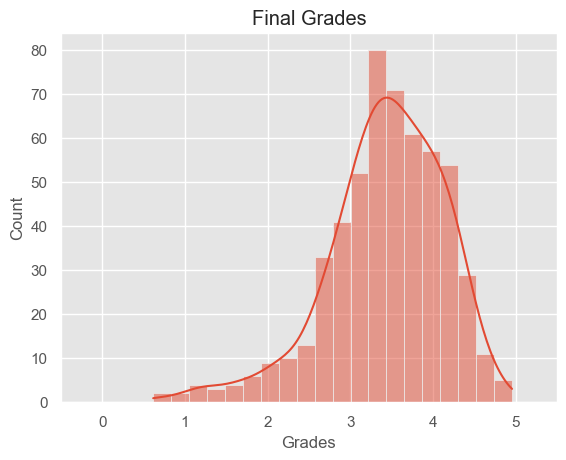

In [148]:
sns.histplot(data = df, x = "FG", kde = True)
plt.xlim([-0.5, 5.5])
plt.xlabel("Grades")
plt.title("Final Grades")
plt.show()